# Лабораторная работа №3

Выполнила Сектименко Ирина, студент группы М8О-410Б-22

## Выбор датасета

Обе задачи я буду решать на одном и том же датасете. Однако выявляться будут разные закономерности.

Данный датасет привлек мое внимание, потому что в современном мире достаточно много людей потребляет кофе и есть много разных точек зрения о его вреде и полезности. По ходу решения задач будут выдвинуты разные гипотезы, которые позволят подтвердить или опровергнуть пользу или вред кофе.

### Классификация

In [1]:
import pandas as pd

In [2]:
class_df = pd.read_csv("synthetic_coffee_health_10000.csv")
class_df = class_df.drop('ID', axis=1)
class_df.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


Будем предсказывать уровень стресса человека.

### Регрессия

In [23]:
reg_df = pd.read_csv("synthetic_coffee_health_10000.csv")
reg_df = reg_df.drop('ID', axis=1)
reg_df.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


Будем предсказывать сколько часов спит человек, зная информацию о количестве потребляемого кофе, испытываемом стрессе.

### Метрики

Для задачи классификации будем считать accurancy, precision, recall, а для регрессии - MAE и MSE.

## Создание бейзлайна

### Классификация

Поработаем немного с данными. Переведем все категориальные признаки (Gender, Country, Occupation) в численные с помощью one-hot-encoding, потому что все значения этих признаков развноправны.

In [3]:
class_df = pd.get_dummies(class_df, columns=['Gender', 'Country', 'Occupation'], drop_first=True)
class_df.head()

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,...,Country_South Korea,Country_Spain,Country_Sweden,Country_Switzerland,Country_UK,Country_USA,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
0,40,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,...,False,False,False,False,False,False,False,True,False,False
1,33,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,...,False,False,False,False,False,False,False,False,True,False
2,42,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,...,False,False,False,False,False,False,True,False,False,False
3,53,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,...,False,False,False,False,False,False,False,True,False,False
4,32,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,...,False,True,False,False,False,False,False,False,False,True


Часть категориальных признаков закодируем label-енкодером. К таким признакам относятся Sleep_Quality, Stress_Level, Health_Issues, потому что чем больше число, тем выше уровень страсса или проблем со здоровьем.

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
label_encoder = LabelEncoder()
class_df['Stress_Level'] = label_encoder.fit_transform(class_df['Stress_Level'])
class_df['Health_Issues'] = label_encoder.fit_transform(class_df['Health_Issues'])
class_df['Sleep_Quality'] = label_encoder.fit_transform(class_df['Sleep_Quality'])
class_df.head()

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,...,Country_South Korea,Country_Spain,Country_Sweden,Country_Switzerland,Country_UK,Country_USA,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
0,40,3.5,328.1,7.5,2,24.9,78,1,14.5,3,...,False,False,False,False,False,False,False,True,False,False
1,33,1.0,94.1,6.2,2,20.0,67,1,11.0,3,...,False,False,False,False,False,False,False,False,True,False
2,42,5.3,503.7,5.9,1,22.7,59,2,11.2,0,...,False,False,False,False,False,False,True,False,False,False
3,53,2.6,249.2,7.3,2,24.7,71,1,6.6,0,...,False,False,False,False,False,False,False,True,False,False
4,32,3.1,298.0,5.3,1,24.1,76,2,8.5,0,...,False,True,False,False,False,False,False,False,False,True


Поделим датасет на тренировачные и тестирующий.

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
class_train, class_test = train_test_split(class_df, test_size=0.2)

Выделим целевой признак.

In [8]:
class_x_train = class_train.drop('Stress_Level', axis=1)
class_y_train = class_train['Stress_Level']

class_x_test = class_test.drop('Stress_Level', axis=1)
class_y_test = class_test['Stress_Level']

Импортируем модель решающего дерева (для задачи классификации) из библиотеки sklearn. Обучим ее на наших данных и спрогнозируем результат на обучающей и тестовой выборке.

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
tree_class = DecisionTreeClassifier(max_depth=2)

tree_class.fit(class_x_train, class_y_train)
class_y_train_pred = tree_class.predict(class_x_train)
class_y_test_pred = tree_class.predict(class_x_test)

Оценим качество обученной модели.

In [11]:
from sklearn.metrics import classification_report

In [12]:
print(classification_report(class_y_train, class_y_train_pred))
print(classification_report(class_y_test, class_y_test_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       751
           1       1.00      0.98      0.99      5614
           2       1.00      1.00      1.00      1635

    accuracy                           0.99      8000
   macro avg       0.96      0.99      0.97      8000
weighted avg       0.99      0.99      0.99      8000

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       210
           1       1.00      0.98      0.99      1375
           2       1.00      1.00      1.00       415

    accuracy                           0.99      2000
   macro avg       0.97      0.99      0.98      2000
weighted avg       0.99      0.99      0.99      2000



Как на тренировочном, так и на тестовом, модель прекрасно справилась с предсказанием уровня стресса. Посмотрим, получится ли у нас улучшить метрики.

### Регрессия

По факту у нас та же самая предобработка данных, что и в классификации. Разница только в выделении целевой переменной.

In [24]:
reg_df = pd.get_dummies(reg_df, columns=['Gender', 'Country', 'Occupation'], drop_first=True)
reg_df.head()

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,...,Country_South Korea,Country_Spain,Country_Sweden,Country_Switzerland,Country_UK,Country_USA,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
0,40,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,...,False,False,False,False,False,False,False,True,False,False
1,33,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,...,False,False,False,False,False,False,False,False,True,False
2,42,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,...,False,False,False,False,False,False,True,False,False,False
3,53,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,...,False,False,False,False,False,False,False,True,False,False
4,32,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,...,False,True,False,False,False,False,False,False,False,True


In [25]:
label_encoder = LabelEncoder()
reg_df['Stress_Level'] = label_encoder.fit_transform(reg_df['Stress_Level'])
reg_df['Health_Issues'] = label_encoder.fit_transform(reg_df['Health_Issues'])
reg_df['Sleep_Quality'] = label_encoder.fit_transform(reg_df['Sleep_Quality'])
reg_df.head()

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,...,Country_South Korea,Country_Spain,Country_Sweden,Country_Switzerland,Country_UK,Country_USA,Occupation_Office,Occupation_Other,Occupation_Service,Occupation_Student
0,40,3.5,328.1,7.5,2,24.9,78,1,14.5,3,...,False,False,False,False,False,False,False,True,False,False
1,33,1.0,94.1,6.2,2,20.0,67,1,11.0,3,...,False,False,False,False,False,False,False,False,True,False
2,42,5.3,503.7,5.9,1,22.7,59,2,11.2,0,...,False,False,False,False,False,False,True,False,False,False
3,53,2.6,249.2,7.3,2,24.7,71,1,6.6,0,...,False,False,False,False,False,False,False,True,False,False
4,32,3.1,298.0,5.3,1,24.1,76,2,8.5,0,...,False,True,False,False,False,False,False,False,False,True


In [26]:
reg_train, reg_test = train_test_split(reg_df, test_size=0.2)

In [27]:
reg_x_train = reg_train.drop('Sleep_Hours', axis=1)
reg_y_train = reg_train['Sleep_Hours']

reg_x_test = reg_test.drop('Sleep_Hours', axis=1)
reg_y_test = reg_test['Sleep_Hours']

Предобработка данных завершена. Теперь обучим и протестируем модель.

In [28]:
from sklearn.tree import DecisionTreeRegressor

In [29]:
tree_regressor = DecisionTreeRegressor()

tree_regressor.fit(reg_x_train, reg_y_train)
reg_y_train_pred = tree_regressor.predict(reg_x_train)
reg_y_test_pred = tree_regressor.predict(reg_x_test)

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [31]:
mse_train = mean_squared_error(reg_y_train_pred, reg_y_train)
mse_test = mean_squared_error(reg_y_test_pred, reg_y_test)
print(f"Среднеквадратичная ошибка трейна: {mse_train}")
print(f"Среднеквадратичная ошибка теста: {mse_test}")

mae_train = mean_absolute_error(reg_y_train_pred, reg_y_train)
mae_test = mean_absolute_error(reg_y_test_pred, reg_y_test)
print(f"Средняя абсолютная ошибка трейна: {mae_train}")
print(f"Средняя абсолютная ошибка теста: {mae_test}")

Среднеквадратичная ошибка трейна: 1.2128736417773056e-32
Среднеквадратичная ошибка теста: 0.49106500000000003
Средняя абсолютная ошибка трейна: 1.3655743202889425e-17
Средняя абсолютная ошибка теста: 0.54645


Модель научилась предсказывать тренировочные данные почти безошибочно.
При этом на тестовых данных она справляется сильно хуже, чем на тренировочных, но приемлемо. Это может быть признаком переобучения модели.

## Улучшение бейзлайна

### Классификация

#### Гипотеза 1

Приверим кореляцию признаков. Посмотрим, какие из них линейно зависимы. Делать это будем с помощью матрицы корреляции.

Однако я уже сейчас могу предположить, что Sleep_Hours и Sleep_Quality линейно зависимы.

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

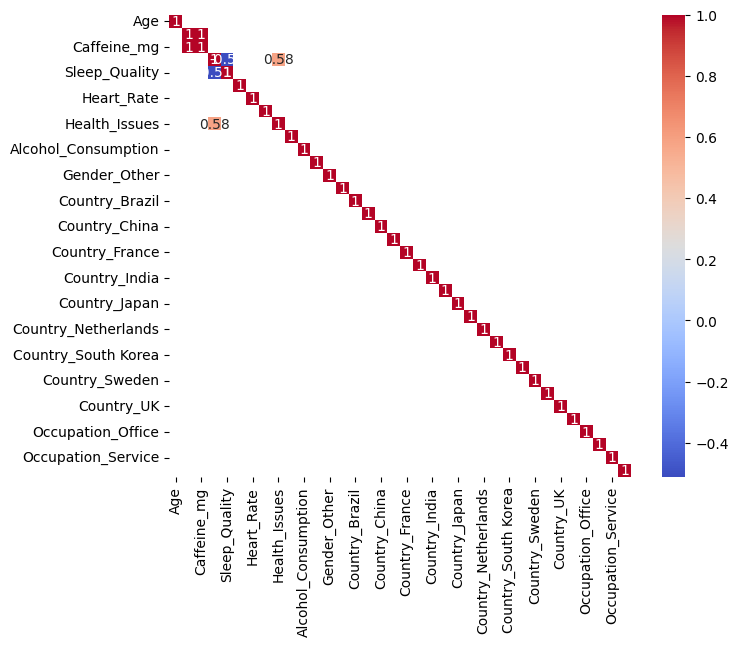

In [18]:
correlation_matrix = class_df.drop('Stress_Level', axis=1).corr()
high_corr = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
mask = high_corr.isnull()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', square=True)
plt.show()

Получили, что столбцы Coffee_Intake и Caffeine_mg линейно зависимы, что в целом логично, чем больше кружек кофе выпьешь, тем больше кофеина получишь.

Столбцы Sleep_Quality и Sleep_Hours коррелируешь на -0,5, Health_Issues и Sleep_Hours - 0,6.

Удалим некоторые столбцы, чтобы избавиться от линейной зависимости.

In [19]:
class_x_test = class_x_test.drop(['Caffeine_mg'], axis=1)
class_x_train = class_x_train.drop(['Caffeine_mg'], axis=1)

In [20]:
tree_class = DecisionTreeClassifier(max_depth=2)

tree_class.fit(class_x_train, class_y_train)
class_y_train_pred = tree_class.predict(class_x_train)
class_y_test_pred = tree_class.predict(class_x_test)

print(classification_report(class_y_train, class_y_train_pred))
print(classification_report(class_y_test, class_y_test_pred))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       751
           1       1.00      0.98      0.99      5614
           2       1.00      1.00      1.00      1635

    accuracy                           0.99      8000
   macro avg       0.96      0.99      0.97      8000
weighted avg       0.99      0.99      0.99      8000

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       210
           1       1.00      0.98      0.99      1375
           2       1.00      1.00      1.00       415

    accuracy                           0.99      2000
   macro avg       0.97      0.99      0.98      2000
weighted avg       0.99      0.99      0.99      2000



Удаление столбца Caffeine_mg, который давал большую корреляцию со столбцом Coffee_Intake ни к чему не привело.

#### Гипотеза 2

Посмотрим к чему приведет настрока гиперпараметров модели.

In [21]:
tree_class = DecisionTreeClassifier(max_depth=3)

tree_class.fit(class_x_train, class_y_train)
class_y_train_pred = tree_class.predict(class_x_train)
class_y_test_pred = tree_class.predict(class_x_test)

print(classification_report(class_y_train, class_y_train_pred))
print(classification_report(class_y_test, class_y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       751
           1       1.00      1.00      1.00      5614
           2       1.00      1.00      1.00      1635

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00      1375
           2       1.00      1.00      1.00       415

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Все метрики - единица, лучше уже быть не может.

Думаю, это связано с тем, что данные созданы синтетически. При максимальной глубине 3 получается максимум 8 листов (может меньше). Получается, что таким разбиением можно идеально описать исходный датасет и разделить его на классы.

При этом, раз на тестовой выборке метрики получились единицами, переобучения у нас нет.

### Регрессия

#### Гипотеза 1

Раз у нас есть подозрение на переобучение, то первое, что стоит сделать, ограничить максимальную глубину решающего дерева.

Заодно потестируем модель с разными другими гиперпараметрами и выберем наилучший результат.

In [32]:
tree_regressor = DecisionTreeRegressor(max_depth=4)

tree_regressor.fit(reg_x_train, reg_y_train)
reg_y_train_pred = tree_regressor.predict(reg_x_train)
reg_y_test_pred = tree_regressor.predict(reg_x_test)

mse_train = mean_squared_error(reg_y_train_pred, reg_y_train)
mse_test = mean_squared_error(reg_y_test_pred, reg_y_test)
print(f"Среднеквадратичная ошибка трейна: {mse_train}")
print(f"Среднеквадратичная ошибка теста: {mse_test}")

mae_train = mean_absolute_error(reg_y_train_pred, reg_y_train)
mae_test = mean_absolute_error(reg_y_test_pred, reg_y_test)
print(f"Средняя абсолютная ошибка трейна: {mae_train}")
print(f"Средняя абсолютная ошибка теста: {mae_test}")

Среднеквадратичная ошибка трейна: 0.23647038946943563
Среднеквадратичная ошибка теста: 0.23809511114109574
Средняя абсолютная ошибка трейна: 0.3980610778194558
Средняя абсолютная ошибка теста: 0.3977321409900136


В основном большинство гиперпараметров решающего дерева направлены на уменьшение переобучения, чтобы дерево не подстраивалось под тренировочные данные.

Метрики на трейне уходшились, зато значительно улучшились на тесте. Кроме того, сейчас метрики с трейна и теста хорошо соотносятся друг с другом, что говорит о хорошем обучении модели.

#### Гипотеза 2

Приверим кореляцию признаков. Посмотрим, какие из них линейно зависимы. Делать это будем с помощью матрицы корреляции.

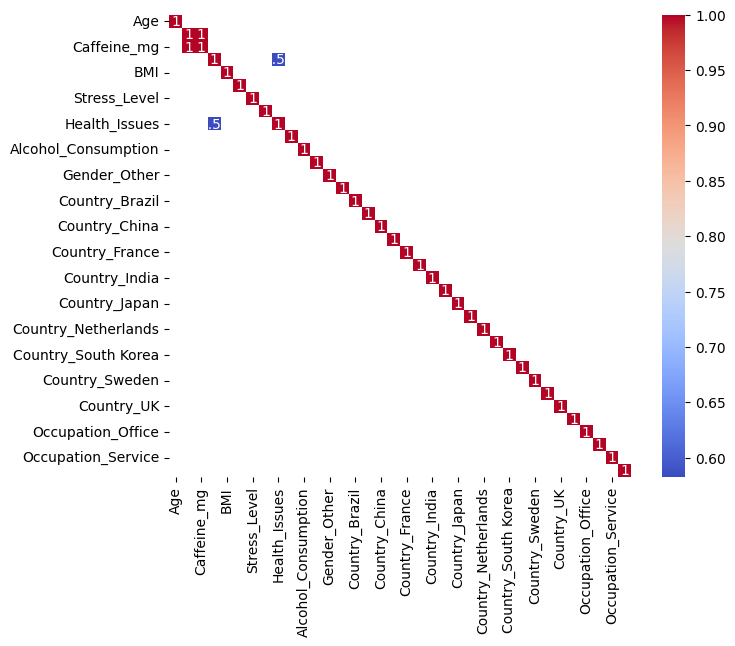

In [33]:
correlation_matrix = reg_df.drop('Sleep_Quality', axis=1).corr()
high_corr = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
mask = high_corr.isnull()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', square=True)
plt.show()

Как и в случае с классификацией, можно сказать, что столбцы Coffee_Intake и Caffeine_mg линейно зависимы. Удалим один из них и проетстируем модель.

In [34]:
reg_x_test = reg_x_test.drop(['Caffeine_mg'], axis=1)
reg_x_train = reg_x_train.drop(['Caffeine_mg'], axis=1)

In [35]:
tree_regressor = DecisionTreeRegressor(max_depth=4)

tree_regressor.fit(reg_x_train, reg_y_train)
reg_y_train_pred = tree_regressor.predict(reg_x_train)
reg_y_test_pred = tree_regressor.predict(reg_x_test)

mse_train = mean_squared_error(reg_y_train_pred, reg_y_train)
mse_test = mean_squared_error(reg_y_test_pred, reg_y_test)
print(f"Среднеквадратичная ошибка трейна: {mse_train}")
print(f"Среднеквадратичная ошибка теста: {mse_test}")

mae_train = mean_absolute_error(reg_y_train_pred, reg_y_train)
mae_test = mean_absolute_error(reg_y_test_pred, reg_y_test)
print(f"Средняя абсолютная ошибка трейна: {mae_train}")
print(f"Средняя абсолютная ошибка теста: {mae_test}")

Среднеквадратичная ошибка трейна: 0.23688900111173247
Среднеквадратичная ошибка теста: 0.2375294785123044
Средняя абсолютная ошибка трейна: 0.3984497028801845
Средняя абсолютная ошибка теста: 0.39727770409680957


Ошибка не уменьшилась. Отсюда можно сделать вывод, что решающее дерево устойчиво к линейным зависимостям.

#### Гипотеза 3

Проведем нормализацию (2 вида), обучим модель, протестируем и сделаем выводы.

Min-max нормализация

In [36]:
from sklearn.preprocessing import MinMaxScaler

In [37]:
scaler = MinMaxScaler()

reg_x_train_new = scaler.fit_transform(reg_x_train)
reg_x_test_new = scaler.transform(reg_x_test)

In [38]:
tree_regressor = DecisionTreeRegressor(max_depth=4)

tree_regressor.fit(reg_x_train_new, reg_y_train)
reg_y_train_pred = tree_regressor.predict(reg_x_train_new)
reg_y_test_pred = tree_regressor.predict(reg_x_test_new)

mse_train = mean_squared_error(reg_y_train_pred, reg_y_train)
mse_test = mean_squared_error(reg_y_test_pred, reg_y_test)
print(f"Среднеквадратичная ошибка трейна: {mse_train}")
print(f"Среднеквадратичная ошибка теста: {mse_test}")

mae_train = mean_absolute_error(reg_y_train_pred, reg_y_train)
mae_test = mean_absolute_error(reg_y_test_pred, reg_y_test)
print(f"Средняя абсолютная ошибка трейна: {mae_train}")
print(f"Средняя абсолютная ошибка теста: {mae_test}")

Среднеквадратичная ошибка трейна: 0.23688900111173244
Среднеквадратичная ошибка теста: 0.2375294785123044
Средняя абсолютная ошибка трейна: 0.39844970288018405
Средняя абсолютная ошибка теста: 0.3972777040968092


Z-score нормализация

In [39]:
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()

reg_x_train_new = scaler.fit_transform(reg_x_train)
reg_x_test_new = scaler.transform(reg_x_test)

In [41]:
tree_regressor = DecisionTreeRegressor(max_depth=4)

tree_regressor.fit(reg_x_train_new, reg_y_train)
reg_y_train_pred = tree_regressor.predict(reg_x_train_new)
reg_y_test_pred = tree_regressor.predict(reg_x_test_new)

mse_train = mean_squared_error(reg_y_train_pred, reg_y_train)
mse_test = mean_squared_error(reg_y_test_pred, reg_y_test)
print(f"Среднеквадратичная ошибка трейна: {mse_train}")
print(f"Среднеквадратичная ошибка теста: {mse_test}")

mae_train = mean_absolute_error(reg_y_train_pred, reg_y_train)
mae_test = mean_absolute_error(reg_y_test_pred, reg_y_test)
print(f"Средняя абсолютная ошибка трейна: {mae_train}")
print(f"Средняя абсолютная ошибка теста: {mae_test}")

Среднеквадратичная ошибка трейна: 0.23688900111173247
Среднеквадратичная ошибка теста: 0.2375294785123044
Средняя абсолютная ошибка трейна: 0.3984497028801846
Средняя абсолютная ошибка теста: 0.3972777040968097


Нормализация не улучшила метрики предсказания.

#### Гипотеза 4

Посмотрим, есть ли выбросы в данных.

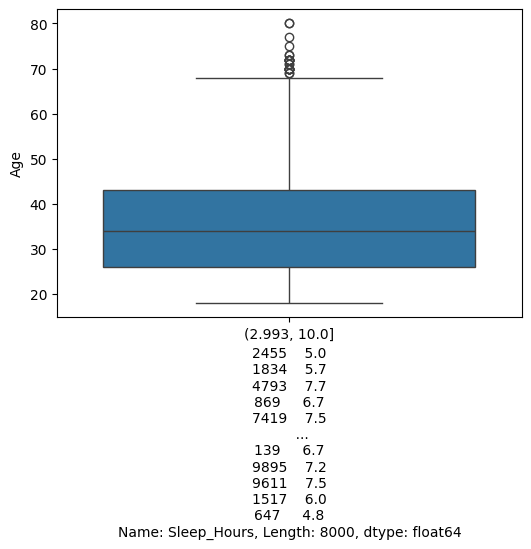

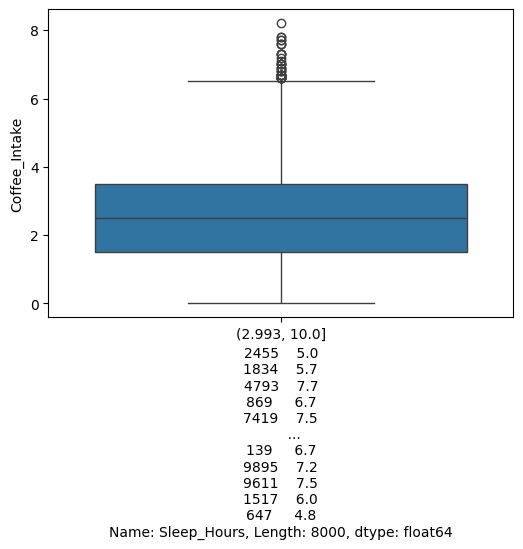

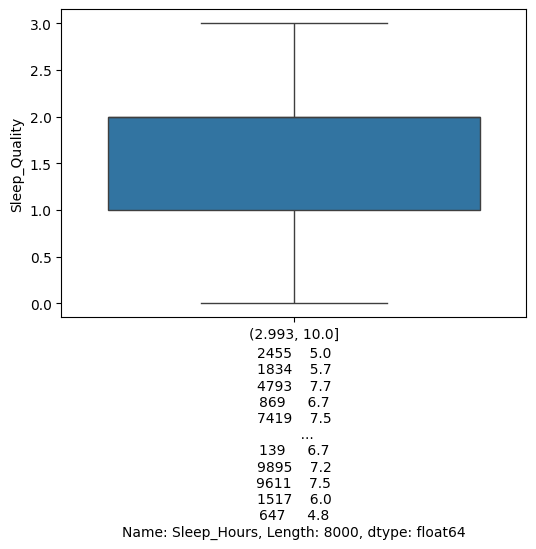

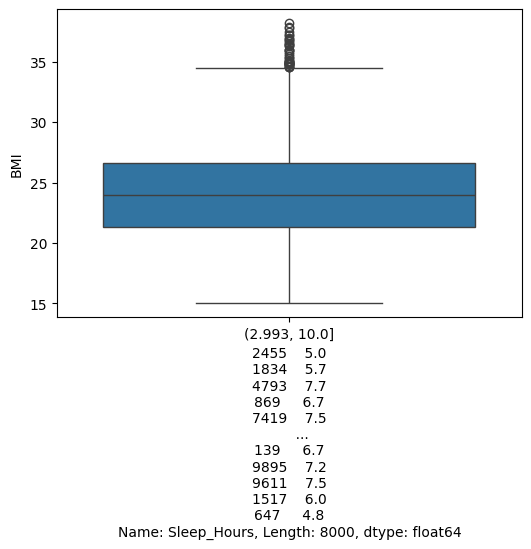

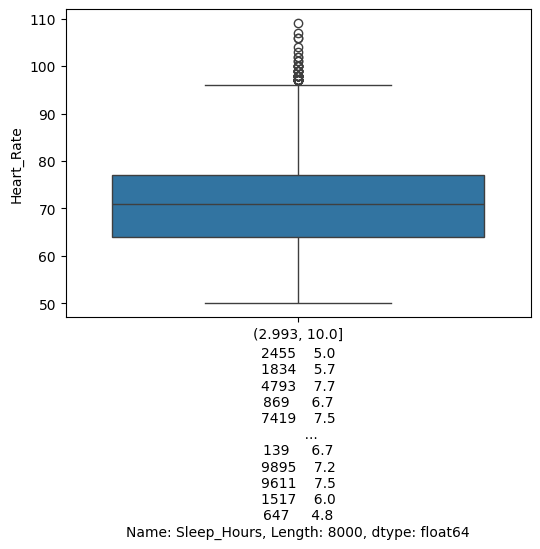

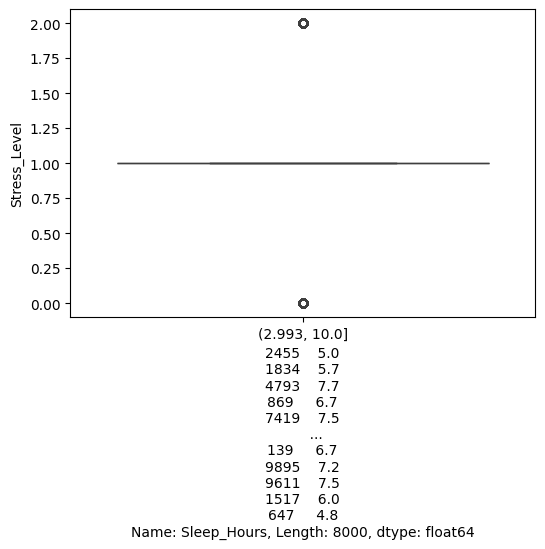

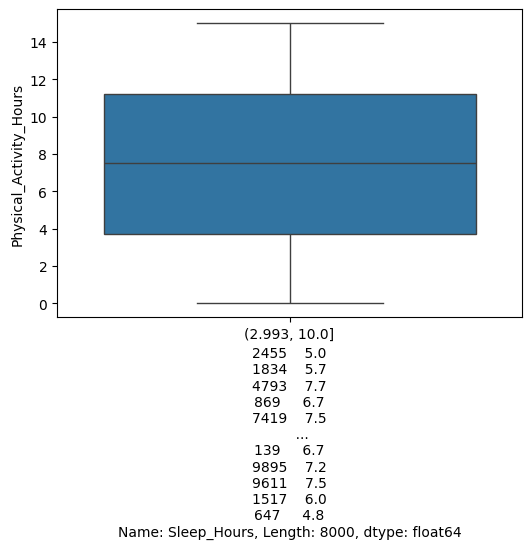

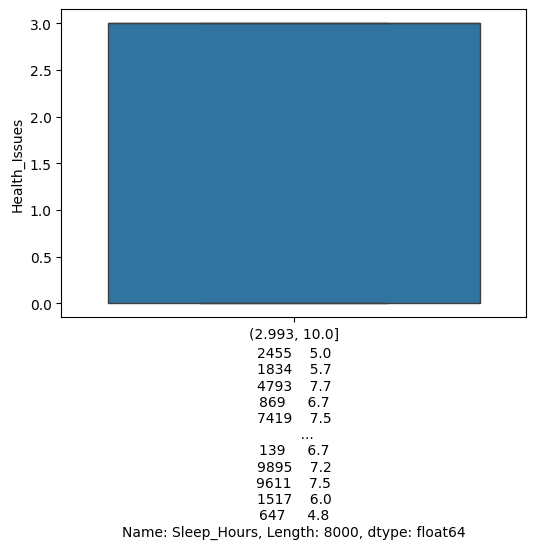

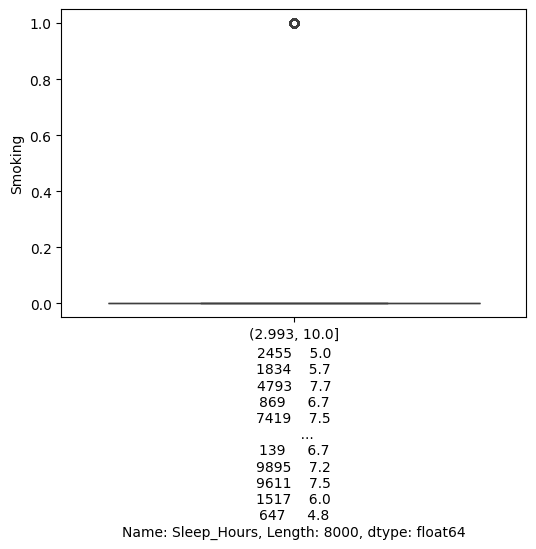

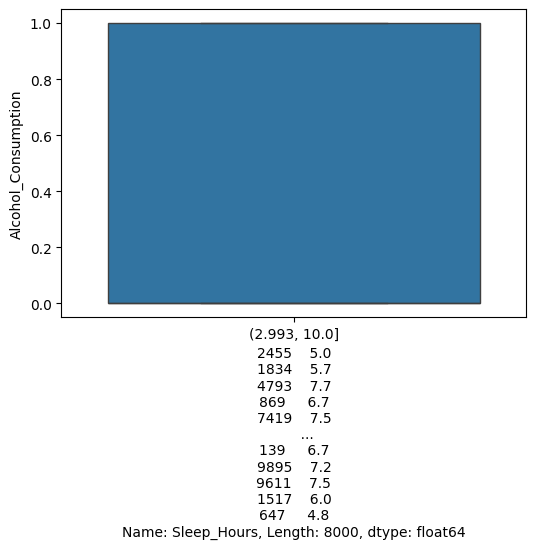

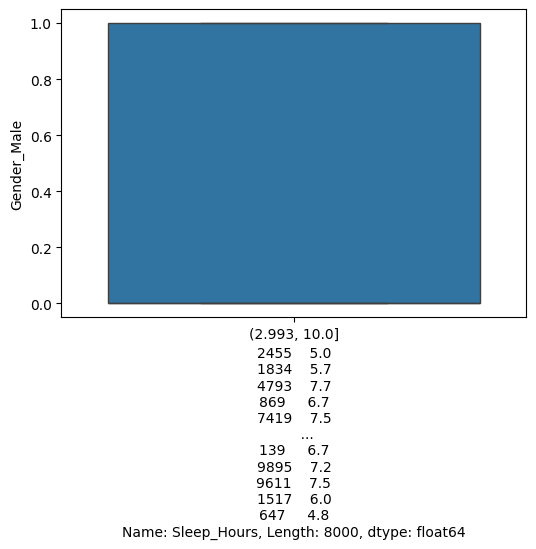

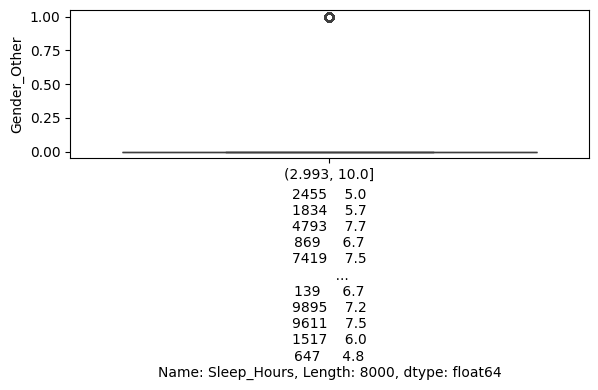

In [42]:
reg_df_plot = reg_df.copy()
reg_df_plot['Sleep_Hours'] = pd.cut(reg_df_plot['Sleep_Hours'], bins=1)

for i, col in enumerate(reg_x_train):
    if 'Country' in col or 'Occupation' in col or col == 'Sleep_Hours':
        continue
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=reg_df_plot, x='Sleep_Hours', y = col)
    plt.xlabel(reg_y_train)
    plt.ylabel(col)

plt.tight_layout()
plt.show()

Попробуем почистить датасет от выбросов и посмотрим, к чему это приведет.

In [43]:
reg_train = reg_train[reg_train["Age"] < 70]

In [44]:
reg_train = reg_train[reg_train["Coffee_Intake"] < 7]

In [45]:
reg_train = reg_train[reg_train["BMI"] < 35]

In [46]:
reg_x_train = reg_train.drop('Sleep_Hours', axis=1)
reg_y_train = reg_train['Sleep_Hours']

reg_x_test = reg_test.drop('Sleep_Hours', axis=1)
reg_y_test = reg_test['Sleep_Hours']

In [47]:
tree_regressor = DecisionTreeRegressor(max_depth=4)

tree_regressor.fit(reg_x_train, reg_y_train)
reg_y_train_pred = tree_regressor.predict(reg_x_train)
reg_y_test_pred = tree_regressor.predict(reg_x_test)

mse_train = mean_squared_error(reg_y_train_pred, reg_y_train)
mse_test = mean_squared_error(reg_y_test_pred, reg_y_test)
print(f"Среднеквадратичная ошибка трейна: {mse_train}")
print(f"Среднеквадратичная ошибка теста: {mse_test}")

mae_train = mean_absolute_error(reg_y_train_pred, reg_y_train)
mae_test = mean_absolute_error(reg_y_test_pred, reg_y_test)
print(f"Средняя абсолютная ошибка трейна: {mae_train}")
print(f"Средняя абсолютная ошибка теста: {mae_test}")

Среднеквадратичная ошибка трейна: 0.23592309704368628
Среднеквадратичная ошибка теста: 0.23818161461144172
Средняя абсолютная ошибка трейна: 0.39756970289813615
Средняя абсолютная ошибка теста: 0.3977687162603008


Во-первых, выбросы были не сильными, можно даже сказать, что их не было. А во-вторых, решающее дерево устройчиво к ним, ведь мы ограничили его максимальную глубину, в результате чего избавились от переобучения.

## Имплементация алгоритма

### Классификация

In [48]:
import numpy as np
from collections import Counter

In [14]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class MyDecisionTreeClassifier:
    def __init__(self, max_depth=5, min_samples_split=2, min_samples_leaf=1,
                 criterion='gini', max_features=None, random_state=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.criterion = criterion
        self.max_features = max_features
        self.random_state = random_state
        self.root = None

    def fit(self, X, y):
        X, y = np.array(X, dtype=np.float64), np.array(y)
        if self.random_state is not None:
            np.random.seed(self.random_state)
        self.root = self._grow_tree(X, y, depth=0)

    def _grow_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        if (depth >= self.max_depth or
            n_samples < self.min_samples_split or
            n_classes == 1):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        best_feature, best_threshold = self._best_split(X, y, n_features)
        if best_feature is None:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        left_idxs, right_idxs = self._split(X[:, best_feature], best_threshold)
        if len(left_idxs) < self.min_samples_leaf or len(right_idxs) < self.min_samples_leaf:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        left_child = self._grow_tree(X[left_idxs], y[left_idxs], depth + 1)
        right_child = self._grow_tree(X[right_idxs], y[right_idxs], depth + 1)

        return Node(feature=best_feature, threshold=best_threshold,
                    left=left_child, right=right_child)

    def _best_split(self, X, y, n_features):
        best_gain = -1
        best_feature, best_threshold = None, None

        if self.max_features is not None:
            if isinstance(self.max_features, str) and self.max_features == 'sqrt':
                n_to_select = int(np.sqrt(n_features))
            elif isinstance(self.max_features, float):
                n_to_select = int(self.max_features * n_features)
            elif isinstance(self.max_features, int):
                n_to_select = min(self.max_features, n_features)
            else:
                n_to_select = n_features
            n_to_select = max(1, n_to_select)
            feature_indices = np.random.choice(n_features, size=n_to_select, replace=False)
        else:
            feature_indices = range(n_features)

        for feature_idx in feature_indices:
            thresholds = np.unique(X[:, feature_idx])
            for thr in thresholds:
                left_idxs, right_idxs = self._split(X[:, feature_idx], thr)
                if len(left_idxs) == 0 or len(right_idxs) == 0:
                    continue

                gain = self._information_gain(y, y[left_idxs], y[right_idxs])
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_idx
                    best_threshold = thr

        return best_feature, best_threshold

    def _information_gain(self, parent, left_child, right_child):
        n = len(parent)
        n_l, n_r = len(left_child), len(right_child)
        if n_l == 0 or n_r == 0:
            return 0

        if self.criterion == 'entropy':
            return self._entropy(parent) - (n_l / n) * self._entropy(left_child) - (n_r / n) * self._entropy(right_child)
        elif self.criterion == 'gini':
            return self._gini(parent) - (n_l / n) * self._gini(left_child) - (n_r / n) * self._gini(right_child)
        else:
            raise ValueError("Criterion must be 'gini' or 'entropy'")

    def _entropy(self, y):
        if y.size == 0:
            return 0
        values, counts = np.unique(y, return_counts=True)
        ps = counts / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def _gini(self, y):
        if y.size == 0:
            return 0
        values, counts = np.unique(y, return_counts=True)
        ps = counts / len(y)
        return 1 - np.sum(ps ** 2)

    def _most_common_label(self, y):
        values, counts = np.unique(y, return_counts=True)
        return values[np.argmax(counts)]

    def _split(self, X_column, threshold):
        left_idxs = np.where(X_column <= threshold)[0]
        right_idxs = np.where(X_column > threshold)[0]
        return left_idxs, right_idxs

    def predict(self, X):
        X = np.array(X, dtype=np.float64)
        if X.ndim == 1:
            X = X.reshape(1, -1)
        return np.array([self._predict_one(x) for x in X])

    def _predict_one(self, x):
        node = self.root
        while node.value is None:
            if x[node.feature] <= node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value

In [53]:
tree_class = MyDecisionTreeClassifier()

tree_class.fit(class_x_train, class_y_train)
class_y_train_pred = tree_class.predict(class_x_train)
class_y_test_pred = tree_class.predict(class_x_test)

In [16]:
print(classification_report(class_y_train, class_y_train_pred))
print(classification_report(class_y_test, class_y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       751
           1       1.00      1.00      1.00      5614
           2       1.00      1.00      1.00      1635

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       210
           1       1.00      1.00      1.00      1375
           2       1.00      1.00      1.00       415

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



Решающее дерево, написанное мной, прекрасно справилось со своей задачей и хорошо разделило все объекты на классы. Как и модель из библиотеки sklearn.

Единственный минус моего решения - оно работает медленнее модели из sklearn.

### Регрессия

In [50]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

class MyDecisionTreeRegressor:
    def __init__(self, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features=None):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.max_features = max_features
        self.root = None

    def fit(self, X, y):
        X, y = np.array(X, dtype=np.float64), np.array(y, dtype=np.float64)
        self.root = self._grow_tree(X, y, depth=0)

    def _grow_tree(self, X, y, depth):
        n_samples, n_features = X.shape
        if (depth >= self.max_depth or
            n_samples < self.min_samples_split or
            len(np.unique(y)) == 1):
            leaf_value = np.mean(y)
            return Node(value=leaf_value)

        best_feature, best_threshold = self._best_split(X, y, n_features)
        if best_feature is None:
            leaf_value = np.mean(y)
            return Node(value=leaf_value)

        left_idxs, right_idxs = self._split(X[:, best_feature], best_threshold)
        if len(left_idxs) < self.min_samples_leaf or len(right_idxs) < self.min_samples_leaf:
            leaf_value = np.mean(y)
            return Node(value=leaf_value)

        left_child = self._grow_tree(X[left_idxs], y[left_idxs], depth + 1)
        right_child = self._grow_tree(X[right_idxs], y[right_idxs], depth + 1)

        return Node(feature=best_feature, threshold=best_threshold,
                    left=left_child, right=right_child)

    def _best_split(self, X, y, n_features):
        best_mse = float('inf')
        best_feature, best_threshold = None, None

        if self.max_features is not None and self.max_features < n_features:
            feature_indices = np.random.choice(n_features, size=self.max_features, replace=False)
        else:
            feature_indices = range(n_features)

        for feature_idx in feature_indices:
            thresholds = np.unique(X[:, feature_idx])
            for thr in thresholds:
                left_idxs, right_idxs = self._split(X[:, feature_idx], thr)
                if len(left_idxs) == 0 or len(right_idxs) == 0:
                    continue
                mse = self._calculate_mse(y[left_idxs], y[right_idxs])
                if mse < best_mse:
                    best_mse = mse
                    best_feature = feature_idx
                    best_threshold = thr
        return best_feature, best_threshold

    def _split(self, X_column, threshold):
        left_idxs = np.where(X_column <= threshold)[0]
        right_idxs = np.where(X_column > threshold)[0]
        return left_idxs, right_idxs

    def _calculate_mse(self, y_left, y_right):
        n_left, n_right = len(y_left), len(y_right)
        if n_left == 0 or n_right == 0:
            return float('inf')
        mse_left = np.var(y_left) * n_left
        mse_right = np.var(y_right) * n_right
        return (mse_left + mse_right) / (n_left + n_right)

    def predict(self, X):
        X = np.array(X, dtype=np.float64)
        return np.array([self._predict_one(x) for x in X])

    def _predict_one(self, x):
        node = self.root
        while node.value is None:
            if x[node.feature] <= node.threshold:
                node = node.left
            else:
                node = node.right
        return node.value

In [51]:
tree_regressor = MyDecisionTreeRegressor()

tree_regressor.fit(reg_x_train, reg_y_train)
reg_y_train_pred = tree_regressor.predict(reg_x_train)
reg_y_test_pred = tree_regressor.predict(reg_x_test)

In [52]:
mse_train = mean_squared_error(reg_y_train_pred, reg_y_train)
mse_test = mean_squared_error(reg_y_test_pred, reg_y_test)
print(f"Среднеквадратичная ошибка трейна: {mse_train}")
print(f"Среднеквадратичная ошибка теста: {mse_test}")

mae_train = mean_absolute_error(reg_y_train_pred, reg_y_train)
mae_test = mean_absolute_error(reg_y_test_pred, reg_y_test)
print(f"Средняя абсолютная ошибка трейна: {mae_train}")
print(f"Средняя абсолютная ошибка теста: {mae_test}")

Среднеквадратичная ошибка трейна: 0.23324510560449904
Среднеквадратичная ошибка теста: 0.24048939108808873
Средняя абсолютная ошибка трейна: 0.3947098535166158
Средняя абсолютная ошибка теста: 0.3989731668519652


Моя реализация решающего дерева для регрессии по умолчанию ограничивает максимальную глубину дерева, в отличие от модели из sklearn.

Как было выяснено в разделе выше, работа с датасетом не привела к улучшением метрик.

Поэтому нет смысла в тестировании модели на "улучшенном" бейзлайне.